In [21]:
# Install necessary libraries
!pip install spacy
!python -m spacy download en_core_web_sm

# Import libraries
import spacy
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import random

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

2023-12-18 13:27:43.695490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 13:27:43.695647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 13:27:43.702038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 13:27:45.287178: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


We load our book and use function for Entity Recognition and Extraction

In [ ]:
def process_text(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


file_path = 'The_Formula_for_Murder.txt' #Kindly upload the File attached here in the working library to make the code working

with open(file_path, 'r', encoding='utf-8') as file:
    book_text = file.read()



# Process the text and get entities
result_entities = process_text(book_text)

# Print all entities and their types
for entity, label in result_entities:
    print(f"Entity: {entity}, Type: {label}")


Code to find Entities and Find f1 score and comparing it with our Manual Labeling

In [22]:
# Import additional libraries
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Function to evaluate performance
def evaluate_performance(true_entities, predicted_entities):
    true_labels = [label for _, label in true_entities]
    predicted_labels = [label for _, label in predicted_entities]
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
    return precision, recall, f1

# Number of evaluations
num_evaluations = 3

# Perform evaluation multiple times
for i in range(num_evaluations):
    # Select random passages for evaluation
    random_passages = random.sample(result_entities, k=len(result_entities)//2)  # Adjust the ratio as needed

    # Manually label the entities in the selected passages
    manual_labels = [('Hailey', 'PERSON'), ('days', 'TIME'), ('James', 'PERSON'), ('impression', 'VERB'), ('America', 'GPE'), ('is', 'VERB'), ('18','CARDINAL'), ('Doyle','PERSON'), ('one hundred pounds','QUANTITY'), ('five hundred U.S. dollars','MONEY'), ('about ten thousand dollars','MONEY'), ('today','DATE'), ('19','CARDINAL'), ('Pulitzer’s','WORK_OF_ART'), ('New York','GPE'), ('Nellie','PERSON'), ('Blackwell’s Island','ORG'), ('three','CARDINAL'), ('Ten Days','DATE'), ('Madhouse','ORG'), ('The Alchemy of Murder.—The Editors','WORK_OF_ART'), ('20','CARDINAL'), ('Conan Doyle’s','PERSON'), ('The Hound of the Baskervilles','WORK_OF_ART'), ('1901','DATE'), ('21','DATE'), ('S. Baring-Gould’s A Book of the West','ORG'), ('1899.—The','CARDINAL'), ('22','CARDINAL'), ('Nellie','PERSON'), ('23','CARDINAL'), ('eleven years later','DATE'), ('1901.—The','CARDINAL'), ('CAROL','ORG'), ('AUTHOR','ORG'), ('CAROL','ORG'), ('Seoul','GPE'), ('South Korea','GPE'), ('Hong Kong','GPE'), ('Japan','GPE'), ('Philippines','GPE'), ('Cape Cod','PERSON')]

    # Process the text and get entities using the code
    predicted_entities = process_text(book_text)
    selected_labels = predicted_entities[:42]

    # Evaluate performance
    precision, recall, f1 = evaluate_performance(manual_labels, selected_labels)

    # Print results
    print(f"Evaluation {i+1} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Exception ignored in: <function _xla_gc_callback at 0x797e62a2a4d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation 1 - Precision: 0.2651, Recall: 0.1190, F1 Score: 0.1205


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation 2 - Precision: 0.2651, Recall: 0.1190, F1 Score: 0.1205


KeyboardInterrupt: ignored

Function to Calculate F1 Scores

PART 2

In [23]:
file = open("/content/The_Formula_for_Murder.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [24]:
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char

#Converting the text into lower case
cleantext = cleantext.lower()


cleantext


'the author and publisher have provided this ebook to you without digitalrights management software drm applied so that you can enjoy readingit on your personal devices this ebook is for your personal use only youmay not print or post this ebook or make this ebook publicly available inany way you may not copy reproduce or upload this ebook other than toread it on one of your personal devicescopyright infringement is against the law if you believe the copy ofthis ebook you are reading infringes on the authors copyright pleasenotify the publisher at usmacmillanusacompiracy                   genevieve j foxey mcclearya strong woman who has the courage to change and a heart of gold my                             sister …                           acknowledgmentssometimes we have an opportunity in life and dont see it until later downthe road i have been given a very wonderful opportunity to write aboutnellie bly and for this i shall always be grateful to linda quinton bobgleason tom dohert

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


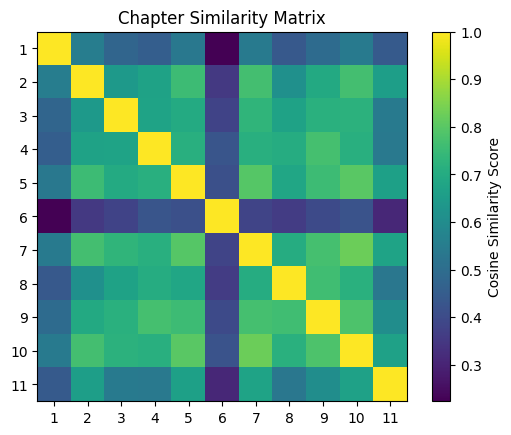

In [29]:
chapters = [
    "journal of nellie bly 1890before i went to england early in the year i had heard tales of the haunted moors of dartmoorthat bleak windswept land where strange creatures are said to roam on moonless nights butnothing prepared me for murder and science gone mad as men tempted the heavens by tryingto create in a test tube that which only god possesses the right to do        what i came to witness in these dark days was men of science crazed by their dementeddreams of creating something no other mortal has done it wasnt the first time murder andmadness was born in scientific experiments and like the question of the chicken and the eggi wonder—is it the science that drives men mad or do the scientists taint their formulas witha bit of their own insanity        was mary shelleys victor frankenstein insane to have brought the dead back to lifewith powerful jolts of electricity—or did the monster he created drive him mad when itbecame murderously uncontrollable victor frankenstein warns another ambitious man of the dangers of trying to achievewhat no one else has ever accomplished calling his success a serpent that has stung him doyou share my madness have you drunk also of the intoxicating draught hear me let mereveal my tale and you will dash the cup from your lips        i have no doubt victor frankenstein would say that mr stevensons ambitious drjekyll actually was the murderous beast rather than the alter ego he created with a potion theviolent mr hyde        be what it may the matter that was to draw me into the dark side of science in the torsand crags of the moors began appropriately enough in a place of the dead                                      ",
    "london 1890 i shiver as i leave a gloomy london day behind me and step into a dankmorgue near the banks of the river thames this small branch of hermajestys coroners office is on a wharf near london bridge in that areacalled the pool the busiest part of the biggest waterfront in the world     the breath of the dead in this examining room has a sharp edge to itsmelling like paint thinner poured over ice blocks of ice are scattered aboutthe room lowering the temperature to slow down decomposition of thebodies with the runoff from the ice and blood slipping through slats in thewood floor     after the first attack on my nose another smell is apparent hiddenunder the prickly acidic tang of cleaning fluid—death a bouquet ofdecomposing flesh blood and body fluids     in a curious way the chill air accented by the scent of blood and fleshremind me of a visit i made to a meatpacking plant in pittsburgh when iwent undercover to investigate the conditions comparing an animalslaughterhouse with an examining room for the dead is a gruesome thoughtusually im not this morbid but the unstirred cold air full of strange smellshas awakened the dark side of my imagination     my name is nellie bly im a crime reporter for the world mrpulitzers newspaper in new york city i came to london and this chamberof death not for a news story but to lay to rest a dear friend     the room had been washed down recently probably moments before istepped in because the slated wood floor is still wet the narrow openingson the floor permit whatever comes out of the bodies to flow into the riverand back to the sea the thought of human essence returning to the ocean isa comforting one since some say that life began in the sea but as i stand fora moment to let my eyes adjust to the gloom of the windowless room thesmell of the thames—poisoned by the noxious wastes of man andmachines—rises to become a dominant stench in the room      the river stinks worse than the dead inspector abberline sayssorry that was badly thought out wasnt it      the scotland yard inspector who i met the previous year when i wasin london following a lead on a murder case1 gives me a look of concernas he hands me a vinegarscented nosegay meant to stun my sense of smell      i put it in my lace hankie but dont put it up to my nose i am here for adear friend and i dont want my senses muted      butcherblock slabs are set out in two rows a dozen on each side likebeds in a hospital ward wood is a cheap but an unfortunate choice formorgue tables because it stains white sheets many stained with blood andother body fluids are tossed haphazardly over bodies not being worked on      inspector abberline had entered before me to prepare the room formy visit—covering the naked dead lest they offend my fragile feminineconstitution i could have told him that i had already seen things in my lifethat no woman—or man—should have seen      from the appearance of the bodies that are not covered most of themhad been pulled from the river already in an advanced state ofdecomposition like new york citys waterways the thames is not agentle environment for human flesh one wonders how the poor fishsurvive      im grateful that most of the bodies are sheeted hiding the cruelties ofman machine or that done by their own hand i have been in morgueswhere bodies are left uncovered lined up like dead fish ready to be gutted      a woman dressed in widows black from bonnet to shoes is sittingnext to a male body on the first slab in the room her head drifts down andthen jerks back up as she fights dozing off a bell tied to the mans wristtells me that shes his wife or other close relative there for the waitingthe procedure occurs when the morgue attendants are not entirely certainthat the man is dead rather than risk burying him alive the bell is placedon his wrist for twentyfour hours if it rings he will be transferred to ahospital rather than the cemetery      my heart goes out to the woman she is a lonely figure full of hopethat has little promise      two tables down from her an attendant wearing a white cloth apron isscrubbing a male body dipping his bloody rag into a bucket and bringing itback bloodred water flying off the rag as it is pulled out of the pailsplashing on the floor and draining through the slats into the river      against the back wall are wood shelves with knives scalpels sawsand other medical instruments and supplies a small cart next to it is piledhigh with dirty bloody rags and clothing      as a crime reporter i have been in morgues before so as my eyessweep this room i recognize that its not a fully functional coronersexamination room despite some of the tools of the trade on the shelvesrather than doctors with saws and knives cutting into bodies or testing vialsof blood for poisons in a hunt for a cause of death i see only dienersmorgue assistants whose duties are to handle and clean the bodies      inspector abberline catches my look at the dieners and reads mythought if theres a serious issue about the cause of death the body istaken to the central morgue for examination most of the poor souls in heregave up the ghost voluntarily or were hastened to their maker by a bluntinstrument in a dark alley so theres no reason for further investigation      kind man that he is he avoids using the word suicide but that is whyi am in this chilly purgatory that is a temporary repose for bodies fished outof the river before finding a permanent place six feet under      something about the dieners with their white cloth aprons stainedwith blood is familiar to me but my thoughts are too crowded with keepingmy feelings under control to put it together the cloth aprons are somethingof a puzzle because the morgue attendants ive seen in the past had wornrubber ones      the remains of hailey mcguire are at the end of the line inspectorabberline says      the remains of hailey mcguire      a few weeks ago i knew a lovely young woman with that name full oflife and spirit the spirit has escaped for what i hope is a better place andnow her name is simply the inscription on a morgue toe tag attached to abody that constitutes the remains she left behind      i can see at a glance that almost all of the bodies in the room are malewhich is to be expected for a morgue on the docks i imagine mostly sailorsfishermen and dockworkers along with an occasional prostitute arebrought here hailey was none of these but people driven to end their livesnot infrequently find their way to water      hailey suicide how sad that is how hard it is to believe      the inspector gives me another concerned look and gently takes myarm were almost there      i give him an im okay smile as we make our way down the path ofthe dead      a gruesome thought that comes to mind is unavoidable one day thegray corpse of nellie bly linked to the name by only a toe tag will be anempty carcass in a place like this i just hope my spirit will have moved onto what i sincerely pray is a better place and not hot as hell—if you knowwhat i mean      the inspector hadnt wanted me to view the body not even after it istransferred to a funeral home these cases where the body has been inwater are best laid to rest with a closed casket viewing hed said but ifeel that i would be cowardly if i avoided seeing my friend and holding herhand as i say goodbye she has no one else      we pass a man who i take from his mackintosh and high rubber bootsto be a fisherman as he bends over a male body perhaps that of a shipmatewhose last port of call was davy joness locker the fisherman is puttingcoins on the eyelids of his mate      paying toll to the ferryman inspector abberline says      i know the superstition a payment to charon the boatman whoferries the souls of the dead across the river styx in the underworld is howmy mother explained it to me when my father died i was six and an oldfriend of his bent over the coffin before it was lowered into the ground toplace coins on my fathers eyes      im sorry      i can only nod my head in thanks for i still miss my father dearly andthe memory of his interment hits me hard as i see the fisherman placing thecoins it had been a rainy gray day with a deepbone chill in the air notunlike the funeral atmosphere i find today in london seeing the cold stiffpallor on my fathers face scarred me making it difficult for me to dealwith death      the coarse brutal man my poor mother married in desperation to keepus children fed after my fathers untimely death had made the scar apermanent open wound when he forced me to watch a cow beingslaughtered when i was a young teenager im making you tough is whathe said but i knew he was being cruel and mean because he found pleasurein playing the bully     i try to put aside those bitter memories as we come to a covered bodyon the last slab in the line     a diener wearing a fouled white apron stands by on the other side ofthe table waiting for us hes overweight with large jowls that quiver as hepurses his lips he slaps a fly off his cheek and looks to the inspector forpermission to remove the sheet my knees start shaking and my heart jumps into my throat ",
    "just a few weeks ago i was in manhattan covering a story about the sextrafficking of young girls from the orient when mr cockerill the managingeditor of mr pulitzers newspaper called me into his office      you need to sit down was the first thing he told me thisproclamation coming in the tone that something was desperately wrongalarmed me my first thought was that something had happened to mymother who lives with me      hailey mcguire committed suicide      he had been right i needed to be sitting when i heard the news      hailey was not just a dear friend but a young woman who like mehad struggled hard to get a job in the male dominated world of newspaperreporting a product of an orphanage without even a high school diplomahailey had been destined for work as a household servant or worse theterrible life of a prostitute having fought tooth and nail to break intoreporting and having left high school myself before completion because ofa heart problem2 i empathized with haileys struggles      actually i was the person who first directed her toward working as areporter after watching her testify at a court trial i was covering two yearsago      the criminal case was against a man who owned a service that referredhousehold servants he was accused of raping a young girl who had appliedfor servant work hailey had also applied through the agency and testifiedin court that the man had indecently touched her and she had fought back toavoid being raped      as i watched her on the witness stand reading from a narration givingthe precise time date and details of the incident i realized her descriptionof what had happened sounded like the newspaper articles i write—evendown to the rocky grammar my first editor said i had      i spoke to her after court and began giving her small assignments tohelp me gather information and was delighted when she came back with notjust what i had asked her for but information that showed she had a nosefor the news      expending no less energy and determination than hercules had done inperforming his twelve labors i managed to get mr pulitzer to take haileyon as a cub reporter running errands in the newsroom and finally getting herown beat at the criminal courts building      both cockerill and pulitzer with their instinctively negative view ofwomen in the workplace had been hesitant first about hiring and thenpromoting hailey finding her too softhearted for crime reporting idisagreed and didnt want to see her pigeonholed into reporting aboutweddings and funerals the only jobs open for women in news reporting—and even then few were filled by women      she gets too emotionally involved with people shes reporting aboutcockerill complained      thats what makes her a good reporter i said knowing it was onlypartly true injustices needed to be reported with an impassioned appeal forthe victims but a reporter has to remain a neutral observer while gatheringthe story i admit that i dont have a talent for keeping my feelings to myselfat any stage of the process but i didnt see her getting worked upemotionally when dealing with wrongs      she knows how victims of crimes hurt because of her ownbackground i reminded cockerill      hailey had not been born an orphan she became parentless at the ageof five when her stepfather bludgeoned her mother to death in front of herhitting her mother over and over with a short club until the womans facewas a bloody pulp and hailey had passed out on the floor after begging andscreaming for him to stop      i rejected cockerills accusation that my experience with my ownstepfather against whom i had testified in court about the cruel treatment hegave to my mother and us children was affecting my judgment      she can do the job i said      i was right—and i was sadly mistaken      yes like me she had a nose for the news and was instinctively drawnto battle injustice but i was able to remain impartial while doing a storynever stepping over the boundaries and getting emotionally involved eventhough i might cry into my pillow at night for what i saw and reportedduring the day      unfortunately hailey stepped over the line when interviewing awoman on trial for stabbing her abusive husband as he was beating her thepolice commissioner approached mr pulitzer with suspicion that afterhailey had interviewed the woman a number of times in jail he believedshe aided the woman by retrieving the murder weapon a kitchen knifefrom where the woman had hidden it she dropped it in the east riverduring a ferry ride the commissioner said—but couldnt prove it      hailey denied the allegation but mr pulitzer wasnt 100 percentconvinced of her innocence because the battered womans situation was tooclose for comfort to haileys own trauma i wasnt convinced either      if hailey had crossed the line she would end up in prison for hernäïveté i didnt believe she would lie to me if i asked her right out so ididnt ask and refused to discuss the situation with her when she appearedready to take me into her confidence      to avoid very bad publicity if one of his reporters ended up in jail foraiding and abetting a murder mr pulitzer whose heart beats with exactlythe same rhythm as the circulations of his newspapers decided to take nochances he buried the problem by sending hailey off to london totemporarily fill the shoes of the papers london correspondent when theman returned to new york with a medical problem      the correspondents job was mostly to cable home stories reported bybritish papers rather than hoofing it to old bailey and parliament to findnews so there was little opportunity for her to get personally involved in astory there was also little chance that hailey would find her job waitingfor her when she returned to new york after the heat over the murder casehad cooled      after telling me that hailey had killed herself cockerill had gotten tohis feet and began pacing he does not have an easy job mr pulitzer is aruthless taskmaster even going to the extreme of employing two men to dothe same job to see which one would pass mr darwins test of survival ofthe fittest      he wants you to get over to london and make sure that your frienddidnt leave any dirty laundry behind      still stunned by haileys death i just stared at him he of course wasmr pulitzer and by calling hailey my friend meant that any dirtylaundry i couldnt clean up would be dumped at my door      i warned him not to send her to london he continued who knowswhat happened over there to cause her to kill herself she wasnt quitebalanced the job was too big for her to handle being raw in the businessand all this is your fault you know she was your protégé      all but his last words had to fight their way through the haze id falleninto when he told me hailey was dead your fault were hot burning wordsthat made me want to cry      adding to the emotional trauma of haileys death was the fact that iam still agitated by what i consider to be mr pulitzers cavalier treatment ofme after i sent the papers circulation figures soaring a few months ago as iraced around the world to beat the record of jules vernes character inaround the world in eighty days3 i would have quit on the spot had myconcern not been to protect haileys memory she was a wonderful personand i was not about to let another reporter trash her name or mine as heradvocate      i left his office fighting back tears walking through the newsroom thatsuddenly became quiet as i entered reporters looked up and then backdown to avoid making eye contact while a couple of them so jealous of mysuccess in their old boys club of reporting that they openly smirked atme but i didnt give them any satisfaction of witnessing a femalebreakdown instead i walked past each and every one of them with myhead held high and my features showing nothing but determination until imade it to the ladies powder room then i burst into tears      i cried for hailey but i was racked with guilt did i drive the pooryoung woman to kill herself because i kept pushing her to jump hurdles thatshe was incapable of leaping      i sat on a toilet twisting my handkerchief around my right index fingeruntil it was red and throbbing from pain mr cockerill didnt have to orderme to go to london if anything it was vital i went i had to make surehailey was properly laid to rest and not thrown in a paupers gravesandwiched between strangers      i also prayed to god that i would prove that they were wrong abouthaileys too gentle disposition and that my insistence on pushing her intothe line of fire as a reporter hadnt so shattered her fragile disposition thatshe came to believe killing herself was less painful than facing life      nellie inspector abberlines voice brought me back to this horriblereality      i gasp as the sheet comes off and i stare into the terrible face of deathwhat chance good lady hath bereft you thus",
    "it isnt hailey at least not the vibrant happy intelligent young woman iknew instead it is a body remains corpse deceased the departed it isbloated corpulent with the bloodless pale complexion of a fishs belly      jesus—joseph—and mary i uncontrollably exclaim im sorry itell inspector abberline and the morgue assistant who has thrown the sheetback over the body it—it caught me by surprise      the inspector takes my arm come dear well talk outside      i shake my head and pull away from the compassionate mans gripno its my duty to her to see this through i cleared my throat how dowe know that—she—is hailey for certain      inspector abberline pulls a charm bracelet out of his pocket and handsit to me recognize this      yes      the bracelet has two dangling objects—a tag with her name scratchedon it and a statue of liberty trinket      i found it curious a young woman of her status as a reporter wouldwear something this uh inexpensive he says      cheap is a better word for it theyre sold by street vendors at thedock where the boat to the statue of liberty boards its tourist junk but ithad great meaning to her you see hailey was an orphan when she waseleven she was sent to work as a household servant she worked long hoursand no matter how it was figured what they charged her for board androom always exceeded the pittance they paid her      sounds like she was indentured      exactly like a slave it happens all the time because orphanages areovercrowded she finally broke loose and moved into a settlement house forimpoverished young women picking up work wherever she could to herthat trip to liberty island which she paid for with her earnings wasconfirmation of her success she took the trip after she got her firstreporting job i choke up and cant admit that i had gotten her the job      inspector abberline pretends to busy himself looking at the bracelet togive me a chance to compose myself      there was a ring too i point at the other side of the shrouded formon the other hand please let me have it      my request is to the assistant the ring with a fake emerald made ofglass is on her right hand it is the only other piece of jewelry i knew her towear i had bought it for her last birthday i want the ring to remember herby its not valuable that is said to assure the morgue worker that i wontbe taking something of value he could have poached off the body himself      he gives the inspector a look and abberline nods the assistant pullsback the sheet just enough to expose the hand its on the fingers arebloated      no i gasp as he takes his knife to cut off the finger no leave iton      before we leave snip the ring off with a cutter inspector abbelinetells the diener you can have the band repaired by a jeweler he says tome      no let it stay with her i feel queasy and weakkneed but regain myequilibrium i meet the dieners eye i will check to make sure its therewhen she is laid to rest      are you certain that its her ring inspector abberline asks      yes i bought it for her why      just an added point of confirmation that confirms identity we havethe bracelet ring and a suicide note the name on the bracelet led us to herrooming house where we found the note shed left out several days offood for her cat and asked in the note that her landlady find a good homefor the cat      what else did the note say      its in the file at my desk so this isnt verbatim but she said … i amso sorry life is no longer worth living hes left me and i have nothing tolive for i feel so lost alone there is no way i can go back to america thethought of prison … no i cant go back i have no place to go and no one tolive for whoever finds this note please make sure my cat is given a lovinghome she also left money for cat food on her dresser by the note      killing herself in despair over a man i dont know how to fit it in withmy memory of hailey she was emotional but i have a hard time coming togrips with her taking her own life for a romance gone sour      she has a birthmark i almost forgot about it      where      behind her right ear a red mark about the size of a shilling betweenher ear and hairline she always pulled her hair forward to cover the ear      i turn away as the sheet is removed and turn back around after i hearthe diener say dont see a mark      can you show me where you remember it      forcing myself i bend down closer and look its not there      inspector abberline strikes a match and uses it to take a look yourecertain it was there      absolutely she used to joke and call it the mark of cain      couldve been washed away by her time in the water the morgueassistant says      quite so inspector abberline agrees      i—ive never heard of that my thoughts are jumbled by the lack ofa mark birthmarks are imperfections in the skin not a stain that can bewashed away      quite true but her body has been bleached as well as it might be hadit been laying in a washtub the rivers so sour it could peel the hide off arhino      i dont know … i just dont understand it i stare down at the bloatedface trying to find hailey in it wait i bend down to get a closer look ather head what is this      a wound the diener says      how did she get it on her head i look to inspector abberline      she most likely hit a rock when she threw herself into the river      or the diener adds it couldve been caused by the impact ofhitting the water if she jumped from a bridge or a passing boat could haveknocked her      the inspector nods to the diener to cover the body and takes mefirmly by the arm back down the path of the dead      i dont understand it i repeat i dont see hailey killing herself oversome man who—      she was pregnant      what i stop and stare at him     nellie dear i didnt want to tell you and color your memory of thesweet girl she didnt tell you anything about it     only that she had met a man she had fallen in love with on myvoyage to england i had kept reading over and over the last letter ireceived from hailey she was all excited about a new beau and how muchthey were in love but she had not given a clue as to who he is     do you know who the father was i ask     he shrugs dont know and wont ever know most likely a marriedman not an uncommon situation he gives me a look or an uncommonchoice for the woman to make     he is right frightfully so that it shakes me to my roots there isnowhere for a pregnant young woman without some means of support to goexcept the foul conditions of a poorhouse     i knew hailey she would never return to that life she would ratherdie than end up back in a house for paupers or worse watch her babystarve                                   requiescattread lightly she is nearunder the snowspeak gently she can hearthe daisies growall her bright golden hairtarnished with rustshe that was young and fairfallen to dust —from oscar wildes poem written in memory of his sister isola who was nine years old when she died.",
    "a cool breeze off the waters of the broad river thames is welcome as icome up the steps from the mortuary and into fresh air when i arrivedearlier the air had that fouled saltwater smell of waterlogged docks fishingboats and coalburning steam ships even though the great port of london ismany miles from the north sea after experiencing a dank taste of a placeof the dead the salty air is a perfume to me      the hansom cab i had arrived in is waiting for me the driver chattingand smoking with the driver of a freight wagon who is adjusting his horsebindings i shake my head letting my cabbie know im not ready to leave iwant to thank inspector abberline for taking the time to accompany me tothe remains of hailey he stayed behind to fill out a form releasing the bodyto a mortuary he assured me would treat hailey with respect i will contactthem to make the arrangements      the thick gray clouds give the impression of a massive dark blankethanging over my head like a shroud—a perfect atmosphere to fit my mood      a sudden wind comes off the water gathering packing materials lyingoutside a warehouse sending the rubbish swirling around just like thethoughts in my head guilt frustration helplessness anger sadness      my thoughts are a jumble and i need to clear them      suicide …      i truly hate this feeling of frustration and guilt how do people copewith suicide      my mind still rebels at the thought that hailey was so desperate soalone that she took her own life i experienced a sense of guilt from themoment i had heard the news but now i am also angry at myself forpushing her when she wasnt ready to be a reporter infuriated too at thelover who stole her innocence and then cast her out      if he had only cast her out—and hadnt murdered her to keep her quieti know where the thought comes from its that old familiar voice in myhead that is always far too suspicious of the dark hearts of others i mustaccept the fact my friend killed herself but paranoia is almost on the list ofmy faults though ive found most of the paranoia ive experienced assimply being heightened awareness      the fact she was pregnant and suffered a blow to the head raised theshort hairs on my paranoia bedeviling me also is the primal instinct in mygut telling me that suicide just doesnt fit haileys excited energetic loveoflife personality      still i have to listen to the other voice in my head the one that isometimes try to ignore but which is calmer and more analytical than theone in my gut and it is saying that hailey was gullible and impressionableand impulsive—a young woman who would often leap first and thinkafterward      that she would get emotionally involved and make love out ofwedlock with the threat of pregnancy is in line with how i see her evenwith a married man i ask myself as impulsive and emotional as haileycan be yes even with a married man      shame on any man who impregnates a woman and leaves herdisgraced and a burden on our society—if they dont end up in a river or ahouse of prostitution      the more i think about it the more tempted i am to track down themarried scoundrel who destroyed her life and write an exposé on the abuseof impressionable young women by older married men      with my anger rising i mosey away from the morgue trying toseparate my thoughts from what i saw in there and what i would do to theman who caused her death i should return to new york rather than wreakvengeance on haileys seducer there is much to occupy ones attention onthe docks boxes of cargo are coming out of the holes of ships in greatnetted bundles and set down on the dock where swarms of dockworkerspack them away onto wagons and into warehouses      down the wharf is a forest of tall masts and smokestacks black fromthe coal burned in their steam engines i see bales of tobacco from virginiacoming off a yankee clipper ship beef from argentina being unloaded froma freighter whose name should be bucket of rust blocks of ice from anorwegian ship moving down a long slide disappearing into an icehouse      the slide is several stories high leading out to a wharf where the iceblocks are coming out the hole of the ship as the cargo net with a singlelarge block sits down on the slide a man on each side uses hooks on longpoles to pull the block free of the thick rope netting and send it skiddingdown the ramp      convenient—an icehouse next to the mortuary      on my way back i realize that on the other side of the mortuary is ameatpacking plant where according to the sign in front argentine beef isprocessed i find it distasteful that the mortuary is so close to aslaughterhouse      putting a morgue between a meatpacking house and an icehouse on abusy dock offends my sense of order in the world and respect for the deadthe chinese would say the morgues position is not an auspicious settingfor a place of the dead that its not feng shui correct because it isnt inharmony with the hustle and bustle of its surroundings      the workers on the docks also strike me as a rather depressing lot notunlike how they are on the docks in new york there is a horribleexploitation of cheap labor for handling cargo with immigrants fromireland and other countries brought in to keep a constant force ofbackbreaking labor to add insult to injury they are housed in terribleconditions and work for long hours for starvation wages      seeing how truly ragged some of the dockworkers are and havingpassed en route to the docks poor neighborhoods with shoeless childrenlooking dirty and malnourished adds to my sense of how unjust the worldis in distributing wealth      some of the workers wear the tattered uniforms of workhouses thosepoorhouses where paupers are taken in and sent out to work for their boardand stay in dormitories where husbands wives and even their children arehoused in separate buildings the atmosphere is grim and intimidating withworkhouse inmates treated not unlike prisoners—men and women onadmission are stripped searched washed and have their hair cut work istedious and laborious living conditions disgusting reminding me of thesmall boy in charles dickenss novel oliver twist who lived in aworkhouse—poor miserable and always hungry      thinking about the haves and have nots and my own miserable yearsas a factory girl but fortunate as a woman to even have gotten a job where iwas paid far less than the men doing the same tasks i am lost in a brownstudy when i hear a shrill cry and look up to a raven on a lamppost      wonderful i tell him how appropriate did you come by to tauntme with nevermore      it appears he did inspector abberline says behind me a victoriacarriage bearing a door insignia of the metropolitan police servicecommonly called scotland yard has arrived as the inspector approachesme he looks up from reading a missive apparently delivered by the policeuniformed driver      and my soul from out that shadow that lies floating on the floor shallbe lifted nevermore he continues my favorite poem he waves one ofthe messages hes holding my commissioner needs to communicate withthe new york city police department regarding miss mcguires passingwe received a query concerning whether she had mentioned anything abouther actions in the new york matter in her suicide note she hadnt      has her uh letter been examined by a handwriting expert icouldnt bring myself to say suicide note      i examined it ive had a bit of experience looking over such thingsby comparing it to her handwriting its quite easy to see that it was done byher own hand she wrote with something of an excited flourish that wouldnot be easy to duplicate had the note been very short say just a sentence iwould have had an expert examine it but it would be very difficult andtime consuming for even a clever forger to get close to a personshandwriting style when dealing with that much writing      i know hes right hes a good policeman who wouldnt be fooled by aforgery but before i return to new york ill sweet talk him into letting mesee the note anyway still i need to ask him about fingerprinting      i just wish you could check for fingerprints      really … so you know about dr henry fauldss awkward conceptfor identifying criminals      yes      im impressed      i hold my chin an inch higher i revel in it when i surprise peopleespecially men with knowledge they dont think a woman would have      then you know the method of identification was dismissed by ourmetropolitan police five years ago      yes and i think its a shame its quite a clever idea taking a personsfingerprints with printing ink and using them for identification do youknow how dr faulds discovered this      no do tell      while accompanying a friend to an archaeological dig he noticed insome ancient clay fragments that the delicate impressions left by workerscould be detected with the human eye he decided to examine his ownfingertips and then compared them to those of his friends each pattern ofridges was uniquely different      interesting abberline says however when he presented his theoryto the commissioner his evidence didnt show that prints are always uniqueto a person or that they can be practically classified and thats just naming afew holes in his notion he eyes me gravely you must accept that yourfriend killed herself      its doesnt even look like her      nellie she was in the water for at least a week i hate to bring this upbut you saw her face its awful what water does to a body and then youhave the fish and…      stop please i understand      im sorry that was insensitive of me      no youre correct      i look down at the ground i wish i could erase that moment when isaw haileys bloated face      he takes my arm and leads me toward the carriages my job as apoliceman would often be simpler if we were able to identify criminals andtheir victims with fingerprints      he has changed the subject deliberately and i welcome it i ask himdid you know that while dr faulds was living in japan his hospital wasbroken into and the police arrested a staff member      he shakes his head i know very little about the mans background      dr faulds thought the man was innocent and he compared thefingerprints left behind at the crime scene to the man they arrested and theywere completely different he was released      very good      it puzzles me that police agencies are still dismissing hisfingerprinting method      because we would have to have everyone in the worlds fingerprintsto make his method useable and that is impracticable and impossible hepauses and gives me another look of concern dont think of the situationas the loss of a friend she is gone and that is her choice and she is nolonger suffering the mental maladies that caused her sorrow shes at peacenow     i give inspector abberline a peck on the cheek youre right     he turns beet red and clears his throat with a guttural rumble nownellie dear please let me drop you off at your hotel we have thecommissioners own fancy carriage he indicates the victoria a fourwheeled carriage with a calash top a seat for two passengers and a perch infront for the bobby driver     thanks but i need to drop by haileys old office on fleet street tosee what needs tending to     ill drop you off and on the way you can look at haileys suicidenote     i thought it was at your office     i knew you would want to see it so i requested it be brought here     i do want to see it but i know in my heart it will throw out thepossibility that haileys death was not by her own hand i dont know if imready for that     shall we go     of course     before we pull away a man comes out of the slaughterhouse next tothe morgue and goes inside he has a bloody apron on and a saw in hishand     now i remember what the morgue attendants and their apronsreminded me of—the pittsburgh meatpacking house i had done a story on     change of shift i ask the inspector",
    "my hands are shaking as i hold haileys suicide note inspector abberline isgracious enough to turn his head and look out the window      if anyone can recognize haileys handwriting its me ive seen enoughof it i believe that inspector abberline has alternative motives for gettingthe suicide note to me he also wants to make sure its haileys because ofmy reluctance like he said to me at the morgue just an added point ofconfirmation that confirms her identity…      i take a deep breath and look down oh no      its not haileys handwriting      no … its hers      he nods his head and looks back out the window      tears roll down my cheek as i read her letter i am so sorry for what iam about to do but my life is no longer worth living hes left me and ihave nothing to live for i feel so lost alone i dont know what to do thereis no way i can go back to america i cant bear the thought of prison no icant and i wont go back i have no place to go and no one to live for thereis only one thing i can do whoever finds this note please make sure my catis given a loving home hailey mcguire",
    "archer stands near the corner of fleet street and hood court as he watchesthe entrance to the international news building halfway down the street heis waiting for a woman he has never seen in person before      a cautious man he occasionally opens up a newspaper to look at asketch of the woman he is on the lookout for the story about the woman inthe paper is not current news but a report months earlier on the progressamerican reporter nellie bly was making in her race around the world      archer stamps his feet trying to keep the blood flowing it is a cooldamp day with the overcast acting as a ceiling to trap the cold wet air      he would not have noticed the chill in the air if he had been walkinginstead of standing around waiting and watching he can feel middle agecreeping up on him with arthritic pain starting at the bottom of his oftenaching feet now that he went everywhere by shanks mare no longer able toafford cabs thanks to his dear exwife who not only put him in thissituation but once the money stopped coming in she upped and left somegratitude      for years he lavished her with expensive clothing even those sillyfancy hats she wore like she was going to a garden party or something abig apartment dinners out in better restaurants than either of them had everbeen in before even going to plays like they were real gentry … then whenhes ratted out by his fellow policemen at the metropolitan police servicefor having his hand out too often she leaves      women … trouble thats what they are nothing but trouble      a street vendor is selling roasted chestnuts on the corner thechestnuts are roasting on a rack over a bed of hot coals in a halfmetalbarrow set atop a rollaway cart      the warm smell of the chestnuts breezes over to archer and he steps tothe vendor and holds out his hand with a piece of newspaper on it      the peddler gives a look at archers worn suit that needs sponging offand a hot iron at his soiled collar the slightly turned rim on his bowler hatand his scuffed shoes he puts two chestnuts on it      four archer says      the man puts two more on four pence      police archer says stepping away      youre not a copper anymore i know who you are the vendorgrabs the poker he uses to stir the coals with and takes a step toward archer      back off archer hisses pulling back his coat exposing a knife in asheath hanging from his belt the only good thing he acquired as adockworker after he was ousted from being a cop a pity job is what hiswife called it just before she left him and she was right his cousin a leadman on the docks got it for him archer hated it but handling cargo gavehim eating money      the vendor returns to his chestnuts muttering curses your kind spitsin the soup to spoil it for everyone else      archer ignores the man as his attention is drawn to a woman gettingout of a carriage in front of the building he glances back at the newspapersketch of nellie bly and then at the woman as she disappears through theentrance      certain it is her and that she will be in the building for a time hemoseys away toward a tea shop where he will muscle a cup of tea andbiscuits much like he did the chestnuts      old habits are hard to stop besides he enjoys exerting the privilegeshe had when he carried a detectives badge it had made up for the lousypay      hes elated that hes been hired to do something easier and betterpaying than carrying cargo like a mule following the american womansince she got off the boat from america has gotten him enough for a goodbit of beef and gin and his instincts are telling him that there is a lot more tobe made      hell be back watching the entrance when she comes out his workwith her is just beginning if he plays it right he will be back on top again                                      8as the carriage pulls away i stand on fleet street the hub of londonsnewspaper world      in new york the major papers have similarly gathered along parkrow which is nicknamed newspaper row mr pulitzer and otherpublishers claim they put their papers there to be close to city hall but italso proves convenient for their reporters to spy on what the other papersare drumming up as with thieves there is no honor among reporters whenit comes to gathering news      even before i enter i know that behind the goodnatured bonhomienewspeople maintain publicly toward each other the true atmosphere of theplace will be cutthroat and secretive—whoever has a door locks it whenthey leave those only with a desk lock that too      the international news building houses correspondents from justabout everywhere that can be reached by the worlds undersea cables andoverland telegraph networks it even has its own cable office hummingwith messages sent off across the channel to paris berlin and rome tonew york on the other side of the atlantic and as far away as bombayhong kong and tokyo      it is truly a miracle of modern science that a reporter can send a storythat will travel several thousand miles under the sea by cable and then racemore thousands of miles on telegraph lines strung on poles across thecontinent to a newspaper in san francisco      sadly my presence at this building is not to send exciting reports ofwars and the rise and fall of empires but to dispose of any confidentialinformation on the news stories hailey might have left behind      the worlds regular correspondent will be back in a few days to keepthe news moving in the meantime mr pulitzer has arranged for acorrespondent from another of his newspapers the st louis postdispatchto also cover for the world      i hesitate hating to go in and rummage through haileys office i feellike a child whos been dropped off at school and doesnt want to enter alittle rain has begun to fall more of a mist than drops i wish it would pourso no one would know ive been crying       first i had to see haileys body and say goodbye to her then i readher suicide note and now i have to leaf through her work sometimes i hatelife       lets get this over with i mumble to myself as i reluctantly enter thebuilding       the newsroom before me is a familiar one not unlike the large baywhere reporters hug desks at the world—there is also the same cloud ofpipe and cigar smoke hovering and the sharp reek of tobacco smoke alongwith spittoons that need a good cleaning like most males of the speciesreporters—almost all of whom are men—believe they have a godgivenright to foul the air and spit disgusting juices at brass spittoons missingoften       a few cubicles along the wall offer some privacy and for the biggestnewspapers a category in which the world falls a stairway to the rightleads up to a balcony lined with doors to small offices i already know thathaileys office will be on the second floor       another common feature of the newsroom is a railing keeping peopleout and a person i call the gatekeeper posted next to the swinging gate tobar entry to all but the privileged       to get my first reporting job i had to make a mad dash past thenewsrooms guardian and through the worlds gate rushing into the officewhere i confronted mr pulitzer and mr cockerill with my plan to prove icould be a reporter by spending ten days in the madhouse for women onblackwells island       i will never forget that day in new york       i was penniless and desperate for work for four months since arrivingfrom pittsburgh pennsylvania i went to every newspaper on park row andwas rejected by them all and to make matters worse the night beforeseeing mr pulitzer my purse was stolen in central park while walkinghome leaving me without a cent that morning i not only borrowed a coatfrom my landlady but cab fare       determined to get an audience with mr pulitzer who had just returnedto new york from abroad filled with pride and persistence i hurriedthrough the newsroom i was not about to go back home defeated instead iplowed through like a steadfast ship its bow breaking water keeping mychin high and carefully lifting my skirt off the floor at least an inch to keepthe bottom from being fouled by tobacco juice that didnt reach thespittoons      my heart had been pounding and i was thrilled to have stepped into arealm where stories of life and death the stock market running amuck fameand disgrace came to life as reporters yelled back and forth at their editorsand a boy ran up and down the aisle grabbing copies from the reporters sothey could rush them to the copy editors      nothing has changed      now over three years later and having earned my salt with storieswritten down the street and around the world i still must face the stares ofseveral dozen men as i a woman dare to invade their territory      once again i put my chin up an extra inch but i cant help wonderhow hailey took the animosity and joking here in london i had alreadybroken in the newsmen in new york to a feminine presence so she didntface as much prejudice as she would have had to experience here      their stares and jabs would probably make someone as sensitive ashailey feel like she was walking onto the battlefield with bullets flying allaround her—a reflection that hits me again with my editors assertion thatshe hadnt been ready for a newspaper reporting job especially in londonthe hub of the newspaper world for all of europe      having to walk past these men every day without having provenherself capable of doing the job as i did with a sensational story wouldchip away at any persons soul no matter how strong they are and haileywas innocent in a beautiful soft way      may i help you madam a young man sitting behind the desk asks      yes im from the world in new york im going to our office here      you must be nellie bly      yes i am how did you—      recognize you from a newspaper clipping hailey—miss mcguirehad she spoke of you often im very sorry about—about what happenedthe young man stammers and blushes then gets up to hold open the gatefor me its a pleasure meeting you      thank you      if i can assist you in any way please let me know      a thought hangs with me as i go up the stairs hailey was a bright andattractive young woman and pregnant knowing hailey the young mandoesnt appear to be a candidate for her lover … but he might have gottenclose to her or even simply went out of his way to observe her i must stopand chat some more with him on my way out because he might be a wealthof information      with a key i brought from new york i unlock the door and enter      the room is a cubbyhole big enough for a rolltop desk against thewall to my right three wooden filing cabinets against the wall to the leftand a dirty window allowing a bit of dull gray light in between      beside the office door is a metal umbrella stand that has one largeblack umbrella in it above it is an empty wooden coatrack with a mans hatand a rain slicker      a chair on rollers is in front of the desk a bookcase and stacks andstacks of faded newspapers and newspaper clippings occupy every spacesomething else isnt taking up even the filing cabinets are piled high withnewspapers cobwebs make up the rest of the furnishings i just pray nospider rears his ugly head while im here i hate spiders      on top of the desk is a soft blue vase filled with pink roses haileysway to add cheer and femininity to this cluttered messy male office that isladen with the heavy smell of tobacco smoke imbedded in the wood      the roses are wilted i wish i had new ones to replace them i hatelooking at the dead roses—they speak of haileys death but they werehaileys and i am not prepared to trash them      i roll up the top of the desk shoved into the back right corner is a piperack holding four pipes next to it is a closed roundmetal tin that containstobacco the desk has coffee mug marks cigarette burns and ink stains allthe signature of the correspondent who regularly occupies the office      the desktop is cleared of most paperwork which surprises me becausetheres only a small space to lay items and hailey wasnt better than anyother newspaper person myself included in keeping manageable the notespictures and other items we gather for stories      either hailey wasnt working on any stories for sometime leading upto her death or she came to the office and cleaned up her desk before killingherself      she was an orderly person and it isnt beyond the realm ofreasonableness to conclude that she would straighten up her desk beforeending her life ive heard of people who washed their laundry beforekilling themselves      going through the desk drawers i find her hot news folder—a slimred leather envelope purse hailey had admired the one i have that i keepmy current work in as a surprise going away gift i gave her one      theres very little in it some notes about a society wedding a minorincident at sea between a british freighter and german warship the failureof a mediumsize london bank not the sort of news interesting toamericans that she was expected to dig up i recognized the articles asfillers that reporters on deadlines keep to fill in on those days when all thegood stories are hiding from you      she must have been so depressed she wasnt working on anything ofimportance in the days before her death      as i pick up a pencil to tap the eraser against my teeth an old habit ofmine i notice the eraser is blackened its been burnt      why would an eraser head be burnt      i look under the desk for a wastepaper basket voilà someone hadburned paper in the metal basket and stirred the ashes with the pencil      another why pops into my head why would hailey do thisreporting isnt that competitive what was so important to hailey that shenot only had to burn it but destroy it completely      or … did the man who ruined haileys life pay a visit to the office todestroy evidence of their relationship or her murder      here i go again am i barking up the wrong tree or have i discoveredsomething my problem is i dont want to face what i have been told iwant to find another truth      its time to speak to the gatekeeper",
    "my instinct about the young man at the gate is that he is or was infatuatedwith hailey the pale thin young man with goldrimmed glasses strikes meas rather shy and perhaps even a little timid hailey had a more outgoingpersonality i cant see them as a match     exuberant excited by life and even rather adventurous hailey wasmore likely to fall into a swoon over a knight in shining armor than a mildmannered clerk but that doesnt mean they hadnt become friends or thathe didnt quietly observe hailey and know more about her than she evensuspected     did you find everything satisfactory he asks as i come out the gateand he rises to speak to me     somewhat mr…     james anderson please call me james     james do you know what trolley i can take to haileysboardinghouse from here with the rain if its much the same as in newyork there is little possibility of me catching a taxi i didnt give him theaddress because i am curious as to whether he knows where she lived     youre so right he chuckles and his face brightens up hailey and iused to laugh about how the cabs mysteriously disappeared off the streetsthe minute it just starts to sprinkle     you shared taxis     no neither of us could afford getting to and from in a hansom werode the same trolley number eightyseven her boardinghouse is just acouple of blocks from mine and the trolley stopped in between go to yourleft when you leave the building the trolley stop is three blocks up thestreet i see you are already outfitted with an umbrella a must in london     i hold up the black umbrella that was in the basket i requisitioned theone from our office james i need to know the stories hailey was workingon but i found very little in her office did she by chance mention anythingto you     no she wouldnt have spoken openly not with them being able tohear a jerk of his head tells me that them are the reporters in thenewsroom     she never mentioned anything at all     no im sorry     do you know who she might have been dating     he shook his head no idea i suspected she was seeing someonebecause she was so happy and excited     she spoke about the person     no not really it wasnt anything she said but how she acted andthere were the flowers     flowers she received flowers from a man     yes i dont know who sent them but i can tell you the man waswealthy     how do you know this     the flowers were exotic not your normal roses or daises     any chance you remember the name of the florist     that wont do you any good     excuse me why would you say that     instead of responding he instantly blushes and looks down at hisshoes     i gently touch his arm you were fond of hailey werent you     ya—yes he stammers     you wanted to make sure no one would take advantage of her so youasked the deliveryman who had sent the flowers     he nods yes but he didnt know a messenger always came withinstructions and payment     i bit my lip as i think about that it sounds very much like the actionsof a married man     miss bly did—did hailey ever mention me in her letters to you     yes she did i lie she was very fond of you     i was very fond of her too     i appreciate your help james if you remember anything pleasecontact me i will be at the langham hotel for the next few days     i turn to leave and stop as he says i dont believe it     believe what     that she killed herself     i take a sharp intake of breath trying not to expose my feelings whydont you believe it people kill themselves every day     arent people supposed to get depressed over a period of time slowlygetting worse and then finally ending it     i almost blurt out not if theyre pregnant but hold my tonguebecause i dont want to damage his memory of hailey instead i ask whatdo you mean     she wasnt depressed she was excited … even secretive     about what     dont know but she acted like any of these reporters act when theythink they have a big scoop they go around like theyre holding theirbreath theyre dying to tell someone but dont dare even give a hint     when did you last see hailey     two days before the police say she killed herself     two days were there other times when she didnt come to the officefor days at a time     not that i recall     and she didnt appear depressed     no im telling you she was secretive     as if she was onto a big story     yes id swear by it it was like she wanted to blurt something out butcouldnt he gave me a long hard look what do you think miss blywhy did she do it why did she throw herself into the river and—     everyone is different is all i can manage before i flee out the door                                    10never have my feet moved so fast to remove myself from a building and ikeep walking fast once i hit the street—very fast im not hurryingsomewhere but fleeing the suspicions of the lovestricken james      holy mackerel and i thought my paranoia runs rampant      i hadnt seen hailey during the days leading up to her death but jameshad and his impression of haileys mood—that clamming up by a reporteron a hot lead but dying to share—is exactly how i act and exactly how iwould expect hailey to have conducted herself\t      face it i tell myself you just dont think hailey killed herself andjames inflamed your suspicions      what if haileys excitement wasnt about a scoop what if herexcitement was about the fact that she had found out she was pregnantand the man she believed loved her lied and told her he would marry herand killed her instead      nonsense but i dont know my paranoia gone wild maybe butjames had added not just his own impressions and feelings about haileybut a couple of curious facts hailey had not been around the office for twodays before she killed herself and the last time he saw her she had been inan elated mood      i chew on the information because it is so inconsistent with the way ilike james imagine the character of a suicidal person to be while it is agiven that her mood could have changed radically over a period of fortyeight hours the state of her office adds another puzzling dimension theoffice had been cleaned out that is the only way i can characterize it in myown thoughts cleaned out as if someone was not planning to return to it      while some people might be tidy about their possessions even whentheir head is full of killing themselves james told me that hailey had beenin a very high mood the last time he saw her two days before she died      if that were the case then hailey would have cleaned out the office ata time when she appeared to a coworker as having a pleasant—even elated—disposition      i shake my head the contradictions are rattling my brain if it isntlikely she would have cleaned out the office when she was in a good moodthen someone else came afterward and did it my prime candidate for themysterious someone would be the lover fearing scandal      as far as getting access to the building without james noting him thatcould have been accomplished any number of ways in fact i should haveasked him if any strangers had been inside the building or if anyone elsehad obtained access to haileys office besides myself      the brown study im in about hailey almost makes me miss the trolleyjames told me to take its crowded and im pushed into a woman next tome as the rail car sets off with a jerk she pushes back and then nudges me      look at that foolish man      a man with a bowler hat is running frantically to catch the trolley hegrabs a handrail at the rear corner of the car and nearly slips under as heloses his footing but hangs on and pulls himself up to get footing on thestep      hes going to get himself killed one day i saw it once with my owneyes a man tried to do the same thing running after the trolley andjumping on while its moving only he wasnt as lucky raining like todaythe poles were slippery he lost hold and he went under it was awful hewas crushed to death by the wheels she shakes her head mark mywords one day hell end up with the same fate      shes right he had been foolish i just hope that whatever his hurry isits worth risking his life for",
    "four other passengers get off at my stop including the man in the bowlerhat who had defied death to get aboard he had ignored the verbal jabs ofother passengers about his feat and seems a surly type     even though the rain has basically stopped the air still feels wet as ifit has soaked into my clothing with haileys boardinghouse a long blockup the street im glad i took the umbrella     the neighborhood of row houses reminds me of the large brownstonesin manhattan except these are older and were more presentable decadespast a bit drab and blackened by the coal soot that is the bane of modernliving most of the houses need tender loving care many have been turnedinto boarding homes     im puzzling over what to say to haileys landlady and mentally kickmyself for not getting a note from the inspector giving me permission toexamine her room and dispose of her effects     i was so distraught over haileys suicide note it slipped my mindsaying im a coworker probably wouldnt be the best approach     im still wondering what to say when the door is answered by a youngmaid     im hailey mcguires sister from america i tell her the lie flowsnaturally off my tongue i did think of her as a sister ive come to collectsome of her belongings would you kindly take me to her room     this is not a complete lie i do need to select clothing for haileysfuneral but i also want to go through her things and see if i can unravel thepuzzle of her last days     she appears hesitant and i fear my bluff isnt going to work     mrs franklin isnt here right now     i promised the funeral director i would get clothes for him today     oh im sorry shell be back shortly     ill wait for her as soon as i am in the foyer i add in haileysroom if you dont mind      i find the foyer a surprise it is a little more pleasant than i imaginednothing fancy just well kept though still boardinghouse impersonal alarge grandfather clock is to the left of the stairway to the second floor aparlor is off to the right and the dining room to the far left its much thesame as the boardinghouses id lived in before i could afford an apartmentall were a little drab and lacking in the warmth a personal touch brings asimple vase of flowers and brighter furnishings would give the place a morecheerful and homey look      as we go up the stairs i ask the maid did you and hailey chatmuch      were not allowed to mingle with the residents she gives me a lookyour sister was a very nice person she always said hello to me and wouldask me how my day was she didnt treat me as a servant      yes thats hailey      i will need to stay with you she says as she fumbles with a skeletonkey as she opens haileys door mrs franklin has very strict rules      please … i need a few moments alone i hate putting her in a spotbut i cant have her watching as i make a thorough search of the room tellmrs franklin that i insisted ill leave the door open      i suppose its all right you being her sister and all ill be just downthe hallway cleaning      haileys room is small she has a window that looks out onto a gardenarea that has suffered the blistering of winterkill but i can see how it mustbe pretty in the spring and summer months hailey was lucky to have awindow it makes the room feel more open      she would have been able to look out when she was relaxing on herbed because the bed is on the wall opposite the window under the windowis a small desk with a round forest green cloth stool to sit on to the left ofthe bed is an armoire that holds clothes and other personal belongings tothe right of the bed and across from the armoire is a washstand with amirror and a little vanity table that has a lipstick blush comb—all laid outas if she is coming back      the washstand has a small white porcelain basin on the floorunderneath are two bowls one has cat food and the other water no cat isaround i hope they found a good home for it      i sit on her bed and look through her nightstand in the drawer is alittle notepad that has a rubber band around it holding a pencil tight aquick peek tells me its her expense accounting for rent food and the likethere are no notations for several days before her death but i want toexamine it more at length so i shove it in my purse and continue goingthrough her dresser there is nothing out of the ordinary whatever storiesshe had been working on she apparently hadnt brought them home yetshe would have been working on a number of them at any one time      why cant i find any notes and clippings she was working on shecabled articles every day to new york most often not original stories shewrote but just a rehash of news she found in london papers that she feltwould interest new york readers yet nothing is at her office or in herroom which begs a question why would she—or someone else—get ridof them      either hailey was being overly tidy before she killed herself—and shewas not a slave to being orderly with her work materials—or someone hadcleaned out everything to ensure that nothing would be found      i do find a pretty brooch that i know she liked and stick it in my pocketas a memento      where hailey i look around the room talking maybe haileysghost is lingering about where did you hide the name of the man youwere involved with      it has to be someplace very secretive but where i peek under hermattress under the bed … nothing i rummage through her armoire …nothing i shove a bunch of hangers over to one side and one drops when ithits the bottom of the armoire it makes a dull thud sound      kneeling down i take out shoes and a hatbox and tap the wood itsounds hollow in the far left inside corner is a tiny hole barely enough toput my finger in i lift off the false bottom and inside the recessed area is abook—a diary      jackpot i go straight to the very last entry she has a cryptic noteim going on a journey further in spirit than my feet will carry me      oh no… barely comes from me as i sink to the floor anyonereading this would interpret it as an admission to suicide there is nothingabout bad love or being pregnant … nothing maybe in her previousentries …       she told me shes her sister…       i jump up almost losing my balance the maids voice is pleadingwith someone       you know the rules       that has to be the landlady her voice reeks with authority       i slip the diary into the pocket of my coat       when the queen of hearts walks in im hanging up a blouse notlooking happy that shes out of the rabbit hole       what are you doing in here       without waiting for an answer she grabs the blouse from my hand as ifi had snatched the crown jewels       you might fool my foolish maid but i will tell you the same thing isaid when her socalled brother came nothing goes out til i confirm it withthe police       her brother im baffled by her proclamation about a brother but itdoesnt last long the nasty woman reminds me of nurse grupe who iencountered during my ten days in a madhouse on blackwells island and ihated that woman if she thinks shes going to bully me shes got anotherthing coming she—we dont have a brother       i know she didnt have any family       im her adopted sister and her supervisor at the newspaper we workfor im nellie bly       i dont care if youre the queen of sheba nothing is leaving thisroom im owed rent and this stuff will be sold to cover it as soon as thepolice are finished with their investigation and it wont be enough to coverit let me tell you       ah … i see her heart is beating with that eternal rhythm that hasdriven human beings since the dawn of time—greed       how much is owed my publisher will make good the full amount ofrent i glance around and of course other than the clothes i will need tohave sent over to the funeral home you can dispose of the rest of the itemsas you wish       the womans face softens to the texture of paving stones welltheres many a charity in need i always say       i am sure that in her case charity begins and stays at home       tell me about this man who claimed to be her brother      he was british he told me that they were estranged and i told him allthe more reason he couldnt look through her stuff estranged in my booksmeans you are no longer family      what did he look like      i dont know i wasnt planning to draw his picture he was mediumbuilt long dark hair blue eyes dont really remember anything else norcare as i told you makes no difference who comes and who says whatnothing goes out until i get me rent im tired of people coming in here likeit was a public place first that abberline copper then the one yesterday thatmade a fine mess going through everything now you doing only the lordknows what nothing leaves here til i get me money      very good policy i only left the officer in charge of the investigationinspector abberline a short time ago i have one other question what washaileys mood in those last few days before she died      how would i know i leave my boarders to themselves as long asthey pay their rent on time have no shenanigans in their rooms and be herebefore i lock the doors at night i dont care what their moods are or whatthey do i keep my nose out of their lives      shes lying of course the woman probably spies on her boarders      did she talk to you or any of the other boarders about a particularstory she was working on      no now—      miss… the voice comes from the maid      maggie go attend to your chores      the maid quickly disappears down the hallway      mrs franklin turns back to me and points at the open door and untili see payment you can leave too      ill arrange payment and be back to select the clothing      what a witch—to put it politely—but i know i have gone as far as ican get with her so i leave besides the diary is burning a hole in mythoughts and i need to get somewhere to read it what a find—if a youngwoman is going to confess her life and loves anywhere it will be in hersecret journal      as i step out the front door of the house and start down the stairs ihear miss miss—      the maid comes out the front door behind me and hurries downlooking nervously back at it      you wanted to know about haileys mood she was happy notdepressed and excited we did talk sometimes she told me shed met theperfect man thats why i was so surprised when the police came and foundher note      did she tell you who the man was      no she couldnt      why not      she said she couldnt because he was very important and well knownwith the rich and powerful she said him and her needed time to figurethings out before making their romance public      when did she tell you this      three days before she took her life she came home late and isneaked her in i couldnt help notice she was wearing a beautiful ring iasked who gave it to her and she told me it was a gift from the man sheloved and that i mustnt tell anyone about it it was a secret she also saidshe was going to be moving out that this man was going to take care ofeverything she was so happy      what did the ring look like      it was a ruby surrounded by diamonds … very expensive      she didnt have a ring like that at the morgue if she had it on when herbody was recovered the morgue attendant or someone earlier took it didshe talk to you about any of the stories she was working on      yes yes… she looks back at the front door      its okay shes probably still in haileys room adding up how muchshe can sell everything for      maggie puts her hand to her mouth to smother a laugh you knowmrs franklin for sure you do about a week before she done herself inmiss mcguire said she was working on a story that would give her … ohwhat was the word … recognition she was so excited but i have no ideawhat it was about im sorry i cant be more help she was always sosecretive about the news stories she worked on but i think i knowsomething maggie uses a confidential tone and glances back again to seeif the boogey woman has reared her ugly head      three or four days before she died i was cleaning her room and ihappened upon an article on her bed stand that she had scribbled on ofcourse i never looked closely at it knowing how she was about keepingthings a secret      of course not what was the article about      a doctor      do you remember the doctors name      no      what about the doctor      some woman lady somebody had died      he killed her      no … i dont know i have to go back in      wait please think do you remember anything about the doctor      she bit her lip hes … hes a health doctor he makes peoplehealthier he was treating the woman with something that wasnt realmedicine and she died ive gotta go      here      i take her hand and put the brooch in it her jaw drops      this is expensive … i cant…      yes now go run before mrs franklin catches you      i too hurry away taking a good deep breath relieved to have gottenaway from that terrible woman i would not have been so kind and gentle toher if i didnt know that she would have taken my tongue lashing out on herpoor servant girl      i take the diary out of my pocket and stick it in my purse once i find acafé i will stop and read the diary over tea and biscuits      my heart pounds … i have haileys diary now i will be able to getanswers      the restraint of not plopping myself down and reading her diary isdriving me nuts but i cant chance the evil queen of hearts watching mefrom an upper floor window to see if i had stolen anything      which i had of course ",
    "archer watches from a hundred feet away as nellie bly comes out of theboardinghouse he picks up his step to stay close enough behind her tomake a quick move if he has to he doesnt want to bring attention tohimself or risk getting his legs chopped off again if she boards a trolley      he gets a jolt as the bly woman pulls a red book out of her pocket andslips it into her purse without looking at it      the diary      it had to be the diary it had that look and color but the furtive wayshe slipped it into her purse was the tipoff that makes him certain shehadnt gotten the book with the landladys permission      how did she get her hands on it      he had bluffed his way into the mcguire womans room yesterday byshowing his old police badge once inside he did a thorough search of theroom he knew from over a dozen years as a copper that women are muchmore clever than men when it comes to hiding evidence but leave it up to awoman to find another womans hiding place      he should have torn the place completely apart even without thepolice badge the old bitch that runs the boardinghouse would have sold himanything he had wanted from the room for a quid      the bly woman turns the opposite direction from the trolley stop asshe comes up to the corner      shes anxious to take a peek in the book going for hot tea and a warmplace to read it good that means she hadnt had time to read it and shewouldnt get her nose between the pages either not on his watch he hasto get it before she reads it that was made very clear to him if he wants toget paid very well      getting this job had been a fluke saving him from the final slip intothe gutter that hed been sliding toward since he had been dismissed fromthe force for taking bribes from a bookmaker to supplement that lousysalary they pay junior detectives      it wasnt his fault he had had a wife who liked luxuries thats howhe kept getting in deeper first for what she wanted to wear and eat and thenshe even demanded he wore expensive suits i aint being seen with a mandressed like a street cop is what she told him so he did the only thing hecould he went on the take looked the other way for a tidy sum from thebookmaker who handled bets on the races and sports as his wifesdemands got bigger and his tastes got more refined he started shakingdown some of the criminals hed collared when one of them tried to turnthe tables by blackmailing he had beaten the man half to death his onlyregret was that he hadnt completed the other half of the beating because thebastard was able to tell a doctor who hed been smacked by and why      if only he had kept his temper down and dumped his wife long agobut he fell hard for her beauty and that she was an actress he neverunderstood why she married him nor did anyone else he was big andburly with a face that had been bashed into too many times over fights hestarted while she was delicate like a china doll she had manners he hadnone      he knew the other coppers were jealous of his gorgeous wife andexpensive habits they constantly were asking him how he did it—withevery one of the bastards knowing and not a few of them also on the take      the money he always had jangling in his pockets aside he knew hehad also made enemies on the force because of his temper his way ofsolving anything right or wrong was to punch hard talking didnt get youanywhere at least thats what he learned from his dad who used his fistsmore than once on archer until archer got big enough to give titfortat      in his mind no one on the force cared that he was taking bribesbecause others were on the take too they just remembered how manytimes he pushed his way in to get what he wanted ratting him out was theirway of getting even      now hes answering to a wealthy aristocrat whos a lot more corruptthan him no one made millions of quid in business without doing thingsunder the table that would make a bank robber look like a saint      he had come into contact with the rich man when he was still on theforce soon after he was promoted to junior detective the mans teenageson was being investigated for beating another boy severely over a girl thefather slipped archer some money and the case got dumped     now the man has another problem a problem the police couldnthandle youll be my consulting detective is what he told archer     archer didnt care about his title all he cared about was the money hewas sick and tired of being poor and he wanted revenge the kind hed getwhen he looked up his exwife and made her green with envy with hispockets full of money hell shove money in her face then to really makeher mad hell lavish it on another actress she knows hes not worriedabout who hell get all actresses are sluts and will do anything for moneyshe did     this book the american woman found in the dead girls room will behis ticket back to the good life he knows something valuable is in itinformation that will make him a wealthy man and if that aristocratic pigwho hired him thinks he is just going to simply turn it over to him for a fewlousy quid—hes in for a big surprise     but first he has to get it from the woman     being the man he is asking her for it politely isnt in the cards                                    13blueeyed brother i mulled over what haileys landlady told me with abritish accent no less now who in the devil is he the elusive lover whyhe would want access to haileys room is the one thing about him imcertain about he wants the diary because there is something in it that willexpose him as her lover and i have the damning evidence      wha— pops out of my mouth as a man comes up from behind megrabs my purse and takes off like a bat out of hell      help help he has my purse i yell at the top of my lungs as i givechase there is no one else in sight on this gray wet day      i only get a glance of him but im positive its the man who made themad dash to get on the trolley near haileys office and got off with me ather boardinghouse      his head goes down and i get the impression hes opening my purse itry to increase my speed but my long dress ridiculous petticoats and bulkyhightopped heeled shoes that encase a woman work against me sprinting      a woman comes out of a food store and the man concentrating on thecontents of my purse runs right into her her grocery bag flies out of herhand exploding as it hits the ground the man stumbles to stay on his feet      my purse flies into the air as he throws it over his head back at me asthe woman he nearly bowled over yells a curse at him      quickly grabbing my purse off the ground i determine that my coinpurse with my gold coins and folded money are inside but something evenmore important is missing haileys diary      whats happened the woman asks me that thief get yourmoney      no not my money      thank god you all right      yes and you      oh im fine cant say the same for me groceries      as we gather up her food the grocer comes out of the store and theychatter about how unsafe the streets are for honest people and the policedo nothing the grocer says      even though i am hearing everything they say none of it penetrates thefog in my brain my god—the diary was stolen taken from me in broaddaylight by a man who must have been following me from haileys office      you sure youre all right the woman asks me again you look likeyouve seen the devil      yes … im okay im just amazed at how devious people are andwhat terrible things rational human beings are capable of      did you hit your head dear      the murky stuff in my head is still there as i am carried away in ahansom cab to my hotel      shocked down to my socks i admit and angry is the lover sodesperate about being exposed that he is resorting to criminal acts itsobvious to me that this is the case and i cant help wondering if there ismore to it than just the mans identity is he also trying to cover up somecomplicity in haileys death did she get that bump on her head before shewent into the water      i dont know whether its a lover trying to avoid scandal or onecovering up murder but i realize that i have been looking for a reason tofind hailey hadnt killed herself almost from the time i got the news in newyork now that i know something is amiss i am confronted with both adilemma and a challenge what can i do about it      im alone in a foreign country thousands of miles from the resourcesand contacts that i can employ whenever i do an investigation and imunder a time pressure the paper expects me to stay only a few days to layhailey to rest and clear up her desk as mr cockerill instructed me afterthat they expected me back beating the bushes for stories      which is another quandary im in do i want to return to the world      their cavalier treatment of me since my return from my trip around theworld has me questioning if i want to continue working for the newspapermr pulitzer and the editorinchief never even said so much as thank youor offered a salary increase or any other reasonable compensation a manwould have received for a similar accomplishment bottom line i did notreceive one cent and my salary has been a very low one      after my insane asylum exposé which i know did not garner a fractionof the publicity and increase in ratings that my trip around the world did ireceived a generous bonus check i have yet to receive one      and not to sound petty but the only thank you i received from mrpulitzer was a cabled congratulation with a note begging me to accept a giftfrom india another item i have yet to receive such treatment would neverhave been given to a man      if i hadnt written around the world in 72 days4 i would be inhorrible financial straights for i am not just taking care of myself i amtaking care of my mother brothers and sister      to make matters worse shortly after i returned my favorite bothercharles died—inflammation of the bowel he was only twentyeight fiveyears older than me5 and that worries me ive been having health issuesmyself and the doctor keeps telling me i need a vacation i thought my triparound the world would be one but instead it was very stressful6 but imustnt think of that for now i have more pressing issues at hand i musthelp provide for his widow sarah and their two small children charles andgertrude after our father died charles and i made a pact always to takecare of each other i will not let him down      so when a book publisher nl munro offered me an incredible threeyear contract to write dimenovel fiction7 in a series of installments for hisweekly new york family story paper—ten thousand dollars for the firstyear and fifteen thousand for each of the next two years8—i couldnt refusewhile this is more than what mr pulitzer will ever offer me reporting thenews is oxygen to my soul and i dont know if im ready to give it up but ido know that healthwise i cant write the books and remain a reporter      my poor head wants to explode but i must focus back on the issue athand—my attacker      the first question is who was the man that attacked me in broaddaylight on a public street hired help i am sure nor did he appear to meto be someone that hailey would have become romantically entangled with      he looked street tough the sort of man youd find in a lowerclass barand hire to do dirty work the kind that the police investigate      i hadnt paid much attention to him when he came aboard the trolleybut reflecting now my impression of him is that while he wore a businesssuit it needed cleaning and some attention from a hot iron indicating to methat he probably isnt married and that he might be down on the heels froma higher position in life than the one he now held      he is hardly the important personage that hailey had boasted about toboth the maid and james the gatekeeper definitely just hired help paid toget the diary and whatever else the lover wanted the covers pulled over butwhat is in the diary that would make haileys lover take the risk of havinghis thug commit a street crime that could send both him and the street toughto prison      the lovers identity or a more serious crime—the murder of hailey      that diary speaks from the grave words that might not be directevidence of murder but might point to the man who made her pregnant andraise questions that would make the police reconsider a simple verdict ofsuicide      then there is the other question eating away at my mind how does thebig story hailey was working on fit in she mentioned doing a major storyto both james and the maid yet i found nothing about it in her room andfound at her office only the red file with just filler stories more importantthan the stories i didnt find were the ashes left behind the onlyexplanation for the burning that my head will accept is that someonepossibly the mugger who attacked me went into her office and burned allevidence of the story      there has to be a connection between the story and the man hailey hadbecome infatuated with that all references to the story were destroyedbecause they led back to the man who wanted his identity kept secret seemsa reasonable conclusion to me but could the two situations be completelyalien to each other a coincidence no way will i accept that the diaryand the news story hailey was working on are linked to haileys lover andher lover obviously has no scruples when it comes to relying on violence toget what he wants i might not have fared as well today if id met that thugin a dark alley      but for the life of me i cant imagine how the lover and the news storycould be linked hailey imitated me in carving out a career in reportingand that meant that inevitably any story that hailey would go overboardabout would involve crime political dirty dealing or other scandalousmatters the world is not a scandal sheet by any means but it did notbecome the circulation champ by being anything but a bareknuckle streetfighter when it comes to the news      my gut tells me i cant go to abberline until i have more evidence hehas the suicide note and i cant tell him what is in the diary as for themugger hell point out that purse snatchings are common instincts in anycity anywhere—and it so happens that london is the most populous city inthe entire world i can almost hear him telling me exactly how many pursesnatchings occur every day in the city—and my retort being of course howmany of them discarded the money in a purse and ran off with a youngwomans diary      his rebuttal will be that the thief got confused and simply startingthrowing things and hed want to know if i continued after the thief to seeif he had soon discarded the diary i didnt and my failure to do so would bethe inspectors coup de grace in the discussion      no a simple purse snatching isnt going to impress him or win himover to my side not without something solid nor will the feelings of amaid and an office clerk that hailey wasnt suicidal since neither was anintimate of haileys      until i have an explanation for the suicide note i cant go to theinspector at the moment the only explanation that sits well with me is thatshe was coerced into writing it under duress unfortunately i have no proofexcept the hairs standing up on the back of my neck and someone muggingme      where to start is not a difficult question for me like hailey i am areporter and know the beat she was working on a story about a medicalscandal involving a health doctor and a highsociety woman so i will startthere and see where it leads me      hopefully the news story and the man in her life who betrayed andprobably murdered her will intersect      i could drop by a newspaper office and ask reporters about recentstories featuring a health doctor and a dead noblewoman but i already havean inside source for london high society and its rumors innuendos andscandals—basically an artery to all that goes on in london society      drop me at the nearest telegraph office i tell the cabbie through thehansom cabs roof door     it is time to contact an old friend one who once fought killers with meand who is not only a worldchampion purveyor of gossip but perhaps alsothe most common subject of gossip in the city and a shameless instigator ofthe most outrageous titillating and racy scandals on the planetyou will find me at the langham under the name of count von kramm     —the king of bohemia from a scandal in bohemia by sir arthur con doyle",
    "im meeting mr ernest i tell the maître d at the dining room in thelangham hotel the grande dame of hotels in the world and the epitome ofelite chic      im escorted to a table to bide my time while i wait for mr ernestwho is my friend and sometime partner in crime—detection of course—oscar wilde      oscars reply to my telegraph had advised me cryptically that hewould present himself incognito at the restaurant thus the mr ernest bitand would offer explanations that must be kept under the rose it took mea moment to realize that under the rose was an idiom for secrecy datingback to ancient times      as the wit and scandalous rascal of london society both because ofhis sharp tongue and refusal to limit his sexual activities to those dictated byrespectable people and straitlaced religious organizations oscars need tohide out could have arisen from any number of things he said—or did      the fact we were meeting in the most fashionable and exquisite hoteldining room in london at a time when oscar is incognito is merely partof the charm of a man who upon his arrival in america to begin hisspeaking tour advised a customs officer that he had nothing to declare buthis genius      i admit i had been taken in by oscars secrecyladen message butwhen my cab dropped me off where the entrance to the hotel is completelylit with electric lights and the doorman who is waiting to help me down andescort me in is dressed as modestly as the admiral of the royal fleet idecided oscar may be more melodramatic than in danger      my poor stomach grumbles and i mutter where are you oscar as iawait his presence his response instructed me to meet him at tenthirty afashionable time for dinner after plays are over i check my fathers pocketwatch hes five minutes late and there is nothing fashionable about myhealthy appetite      ive never gotten used to chic latenight eating not even after severalyears in new york and im hungry enough to nibble on the wood table inmy hometown of cochran mills pennsylvania population exactly 534 igrew up having dinner at six sharp not hours after the sun has gone down      i almost feel like getting up and going back to roam again in theencased garden atrium its really lovely and so unexpected in downtowngray foggy london they took the inner courtyard and covered it with aniron and glass roof so it can be enjoyed yearround scattered among theflowers and trees are wroughtiron tables and cushioned chairs and benchesso one can sit and gaze at the stars as they sip wine i imagine it must bebeautiful to sit and watch snowflakes fall it would be like being in one ofthose glass balls my mother has that you shake and watch the snow fall onthe animals in a forest      ive traveled the world and seen many gorgeous hotels but never havei experienced a place as elegant as the langham throughout the publicareas they have intricately laid mosaic flooring decorated in white goldand scarlet selectively hanging on walls covered with handprintedwallpaper are moorish murals and silk hangings—each having a story oftheir own to tell white marble pillars that give one the feeling of purewealth are standing guard all about      coming through the grand entrance hanging on the hallway wallleading into the dining area is a persian tapestry carpet that must have cost akings ransom      the dining room is enormous and simply dazzling their wallpaper isa light creamy beige adorned with little golden angels each holding a blackbow and arrow—some shooting arrows and some sitting on fluffy whiteclouds and something ive rarely seen electric chandeliers—thousands ofcrystals of all shapes and sizes lit with lightbulbs there are over a dozen ofthese brilliant lighting fixtures hanging from the fourteenfoot ceiling whichis a highly polished pinkish italian veneziano plaster—or as the italians saythe womens stucco because it burnishes to an even gloss with very littleeffort white marble pillars are scattered among the tables one wall isfloortoceiling glass that overlooks the encased garden all this creates asumptuous atmosphere perfect for eating … which im dying to do      when the maître d took me to my table i paused for a moment andstared at a large stone fireplace with roaring flames on the opposite wallfrom the glass wall—the wood is not being burned a gas fireplace hetells me with ceramic logs      amazing what will they think of next      our table sits right in the center of the room if oscar wantsanonymity this is definitely not going to please him however if i take intoconsideration a pillar which is right by our table oscar might have a littleprivacy from the curious if he is truly planning to appear in some sort ofdisguise      each table is set with floral china sitting on top of silver charger platessterling silverware crystal water and wine glasses a small vase of flowersand a candle in a decorative etched glass candleholder in the center of thetable some settings like mine have a crystal wine holder that looks like aduck      after seeing what other diners are wearing im not happy being in thecenter of the room and find myself leaning toward the pillar to hide thecouture is formal men are in white tie the women in evening gowns somesleeveless with long gloves most with feathered hats and almost everywoman has either a pearl necklace dazzling diamonds—or both      not many months ago i completed a seventytwoday trip around theworld with only one change of clothes that i carried in a small valise yetmanaged to attend shipboard dinner parties without shame i came tolondon with the same valise and the same one change of clothes and thesame lack of embarrassment i work hard and travel fast and light andrefuse to load myself down with trunks in order to look fashionable      if the other women in the world believe they are seeing an uglyduckling crossing the room they are probably right but id like to tell eachof them that i earn my own duck food      i hear a stir and murmuring among the diners and look toward thedoor      there he is in all his glory pausing as he enters i shake my head andsigh incognito      oscar is wearing a green velvet suit with wide lapels a white silk shirtwith a lord byron collar and an oversized red tie that is loosely tied and aswide as a scarf his cape is purple and reaches nearly down to the heels ofhis brilliantly polished black patent leather shoes his hat is black andwould have gone nicely on the head of one of the three musketeers     besides the clothing that would have raised eyebrows at a showing ofalices adventures in wonderland much less at a posh restauranthotel inthe heart of londons west end everything about oscar is big—sixfootthree soft and flabby with a low mezzo voice that people concentrated tohear yet reaches across a room his mind is big too encyclopedic histongue a guillotine that cuts through hypocrisy and affronts with a razoredged blade     he excitedly waves his hand as he weaves around a sea of tablescoming toward me with as much subtlety as shermans march on atlanta—no make that moses crossing the red sea oscar is carrying a white poochdressed much the same way he is                              oscar wildei think that god in creating man somewhat overestimated his ability                                                                       —oscar wilde"
]

# Create TF-IDF vectors for each chapter
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(chapters)

# Calculate cosine similarity between chapters
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Visualize the similarity matrix as a gradient table
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.title('Chapter Similarity Matrix')
plt.xticks(np.arange(len(chapters)), np.arange(1, len(chapters) + 1))
plt.yticks(np.arange(len(chapters)), np.arange(1, len(chapters) + 1))
plt.colorbar(label='Cosine Similarity Score')
plt.show()